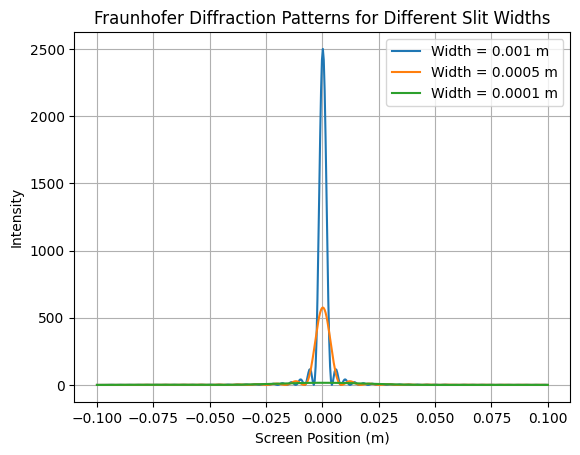

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fraunhofer_diffraction_slit(widths, wavelength, screen_distance, num_points=500):
    # Define the x values for the aperture (in meters)
    x = np.linspace(-0.005, 0.005, num_points)

    # Define the x values for the screen (in meters)
    x_screen = np.linspace(-0.1, 0.1, num_points)

    for width in widths:
        # Define the aperture function
        aperture = np.where(np.abs(x) <= width / 2, 1, 0)

        # Calculate the Fraunhofer diffraction pattern using Fourier transform
        diffraction_pattern = np.abs(np.fft.fftshift(np.fft.fft(aperture)))**2

        # Plot the diffraction pattern
        plt.plot(x_screen, diffraction_pattern, label=f'Width = {width} m')

    plt.title('Fraunhofer Diffraction Patterns for Different Slit Widths')
    plt.xlabel('Screen Position (m)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the parameters
widths = [0.001, 0.0005, 0.0001]  # Slit widths in meters
wavelength = 500e-9  # Wavelength of light in meters (500 nm)
screen_distance = 1  # Distance to the screen in meters

# Run the simulation
fraunhofer_diffraction_slit(widths, wavelength, screen_distance)


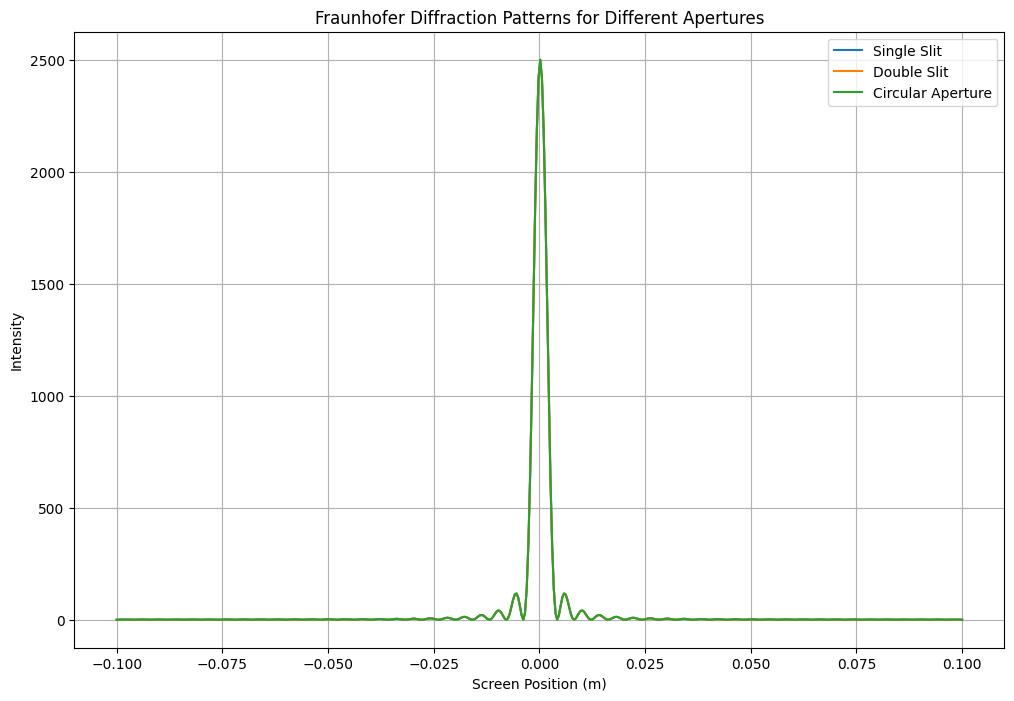

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
wavelength = 500e-9  # Wavelength of light in meters (500 nm)
k = 2 * np.pi / wavelength  # Wavenumber
D = 1  # Distance to the screen in meters
N = 500  # Number of points in the aperture function

# Define the x values for the aperture (in meters)
x = np.linspace(-0.005, 0.005, N)

# Define the x values for the screen (in meters)
x_screen = np.linspace(-0.1, 0.1, N)

# Define the aperture functions
aperture_single_slit = np.where(np.abs(x) <= 0.001 / 2, 1, 0)
aperture_double_slit = np.where((np.abs(x) <= 0.001 / 2) | ((np.abs(x - 0.002) <= 0.001 / 2) & (np.abs(x + 0.002) <= 0.001 / 2)), 1, 0)
aperture_circular = np.where(x**2 <= (0.001 / 2)**2, 1, 0)

# Calculate the Fraunhofer diffraction patterns using Fourier transform
diffraction_pattern_single_slit = np.abs(np.fft.fftshift(np.fft.fft(aperture_single_slit)))**2
diffraction_pattern_double_slit = np.abs(np.fft.fftshift(np.fft.fft(aperture_double_slit)))**2
diffraction_pattern_circular = np.abs(np.fft.fftshift(np.fft.fft(aperture_circular)))**2

# Plot the diffraction patterns
plt.figure(figsize=(12, 8))
plt.plot(x_screen, diffraction_pattern_single_slit, label='Single Slit')
plt.plot(x_screen, diffraction_pattern_double_slit, label='Double Slit')
plt.plot(x_screen, diffraction_pattern_circular, label='Circular Aperture')
plt.title('Fraunhofer Diffraction Patterns for Different Apertures')
plt.xlabel('Screen Position (m)')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()


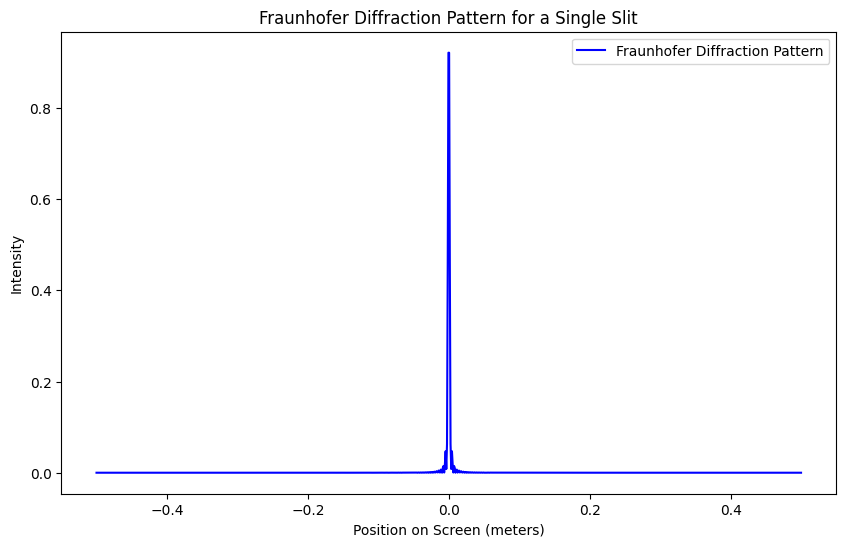

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fraunhofer_diffraction_pattern(wavelength, slit_width, distance_to_screen, screen_width, num_points):
    """
    Simulate Fraunhofer diffraction pattern for a single slit.

    Parameters:
    - wavelength: Wavelength of the incident light (in meters).
    - slit_width: Width of the slit (in meters).
    - distance_to_screen: Distance from the slit to the observation screen (in meters).
    - screen_width: Width of the observation screen (in meters).
    - num_points: Number of points for the simulation.

    Returns:
    - x_values: x-coordinates on the screen.
    - intensity: Intensity distribution on the screen.
    """
    # Constants
    k = 2 * np.pi / wavelength  # Wave number
    alpha = k * slit_width / 2  # Constant term

    # Coordinates on the screen
    x_values = np.linspace(-screen_width / 2, screen_width / 2, num_points)

    # Intensity calculation using single-slit diffraction formula
    intensity = (np.sinc(alpha * x_values / distance_to_screen))**2

    return x_values, intensity

# Simulation parameters
wavelength = 500e-9  # Wavelength of light (in meters, e.g., 500 nm for green light)
slit_width = 50e-6   # Width of the slit (in meters, e.g., 50 micrometers)
distance_to_screen = 1.0   # Distance from the slit to the observation screen (in meters)
screen_width = 1.0    # Width of the observation screen (in meters)
num_points = 1000     # Number of points for simulation

# Simulate Fraunhofer diffraction pattern
x_values, intensity = fraunhofer_diffraction_pattern(wavelength, slit_width, distance_to_screen, screen_width, num_points)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, intensity, color='blue', label='Fraunhofer Diffraction Pattern')
plt.title('Fraunhofer Diffraction Pattern for a Single Slit')
plt.xlabel('Position on Screen (meters)')
plt.ylabel('Intensity')
plt.legend()
plt.show()
